In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
data_dir = '/Users/davidriser/Data/air_bnb_boston'

In [3]:
listing_df = pd.read_csv(data_dir + '/listings.csv')
calendar_df = pd.read_csv(data_dir + '/calendar.csv')
map_df = pd.read_csv(data_dir + '/geoMap.csv')

In [4]:
listing_missing = listing_df.isnull().sum().sort_values(ascending = False) / len(listing_df)

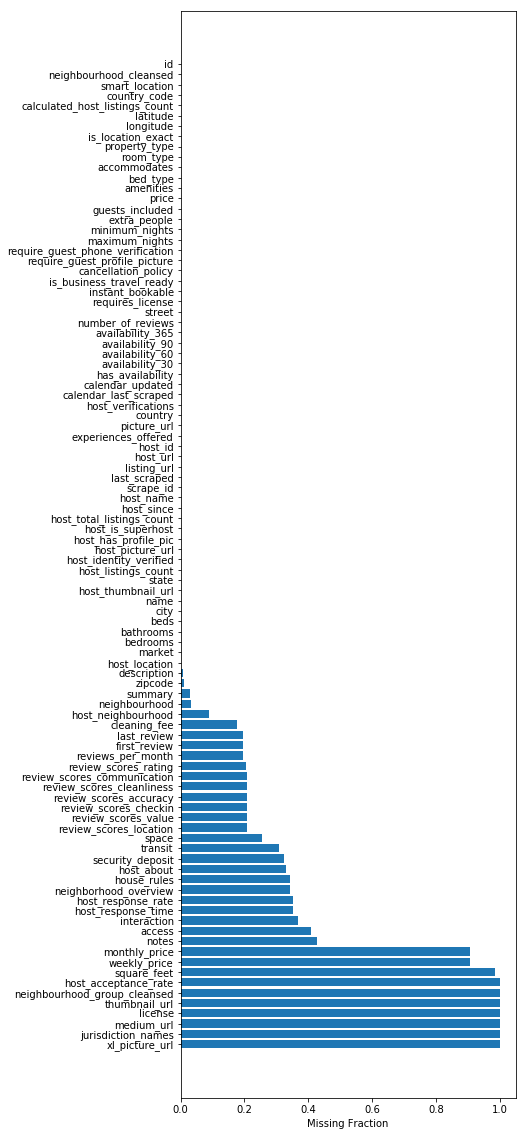

In [5]:
plt.figure(figsize = (6, 20))
plt.barh(listing_missing.index, listing_missing.values)
plt.xlabel('Missing Fraction')
plt.savefig('image/missing_values.pdf', bbox_inches = 'tight')

In [6]:
keep_cols = [
    'latitude', 'longitude', 
    'beds', 'bedrooms', 'bathrooms', 'accomodates', 
    'price', 'availability_30', 'availability_60',
    'availability_90', 'availability_365', 'property_type',
    'room_type'
]

In [7]:
for col in listing_df.columns:
    if col not in keep_cols:
        listing_df.drop(col, inplace = True, axis = 1)
        
listing_df['price'] = listing_df['price'].replace( '[\$,)]','', regex=True).astype(float)

In [8]:
plt.rc('font', size = 18)
plt.rc('font', family = 'serif')

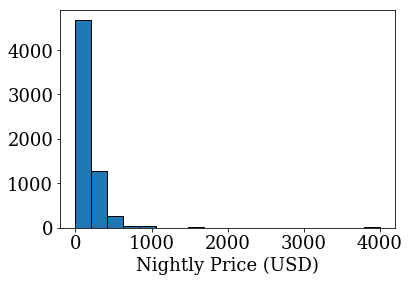

In [9]:
plt.hist(listing_df['price'], bins = np.linspace(0, 4000, 20), edgecolor = 'k');
plt.xlabel('Nightly Price (USD)')
plt.savefig('image/price_histo.png', bbox_inches = 'tight')

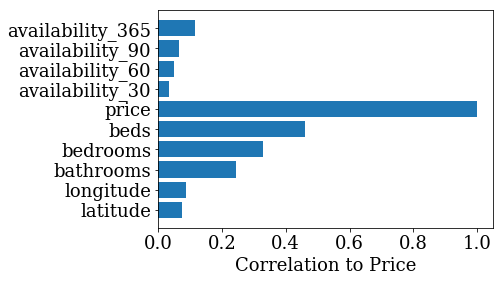

In [10]:
plt.barh(
    listing_df.corr()['price'].index,
    listing_df.corr()['price'].values
)

plt.xlabel('Correlation to Price')
plt.savefig('image/price_corr.png', bbox_inches = 'tight')

(array([2145.,  223.,  282.,  264.,  309.,  412.,  373.,  484.,  518.,
        1286.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

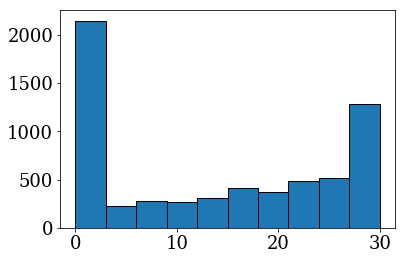

In [11]:
plt.hist(listing_df['availability_30'], edgecolor = 'k')

In [64]:
listing_df.corr()

,latitude,longitude,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,price_category
latitude,1.000000,0.416332,-0.046515,-0.180918,-0.166102,0.119039,0.013500,0.019791,0.011310,-0.004467,0.119765
longitude,0.416332,1.000000,-0.009578,-0.059320,-0.048913,0.130918,0.052375,0.058579,0.063268,0.060790,0.130202
bathrooms,-0.046515,-0.009578,1.000000,0.576795,0.483637,0.431118,0.020203,0.020393,0.021213,0.050105,0.404442
bedrooms,-0.180918,-0.059320,0.576795,1.000000,0.741219,0.357842,0.029728,0.016490,0.020206,0.023291,0.319831
beds,-0.166102,-0.048913,0.483637,0.741219,1.000000,0.280930,0.113371,0.096120,0.094202,0.101955,0.245557
price,0.119039,0.130918,0.431118,0.357842,0.280930,1.000000,0.097254,0.102946,0.100073,0.109606,0.943339
availability_30,0.013500,0.052375,0.020203,0.029728,0.113371,0.097254,1.000000,0.941297,0.875105,0.612548,0.089748
availability_60,0.019791,0.058579,0.020393,0.016490,0.096120,0.102946,0.941297,1.000000,0.972050,0.692516,0.102424
availability_90,0.011310,0.063268,0.021213,0.020206,0.094202,0.100073,0.875105,0.972050,1.000000,0.737765,0.103980
availability_365,-0.004467,0.060790,0.050105,0.023291,0.101955,0.109606,0.612548,0.692516,0.737765,1.000000,0.120626


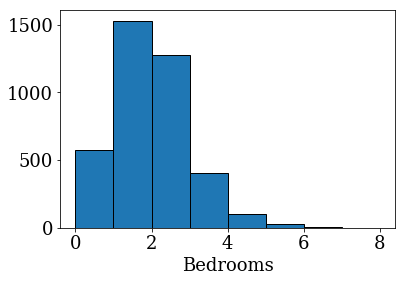

In [59]:
plt.hist(listing_df['bedrooms'], edgecolor = 'k', bins = np.arange(0, 9));
plt.xlabel('Bedrooms')
plt.savefig('image/bedrooms.png', bbox_inches = 'tight')

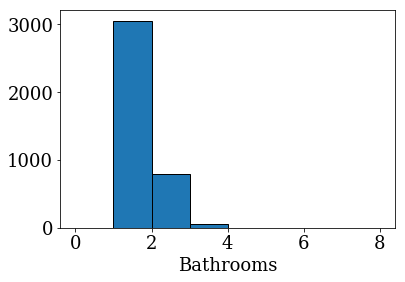

In [60]:
plt.hist(listing_df['bathrooms'], edgecolor = 'k', bins = np.arange(0, 9));
plt.xlabel('Bathrooms')
plt.savefig('image/bathrooms.png', bbox_inches = 'tight')

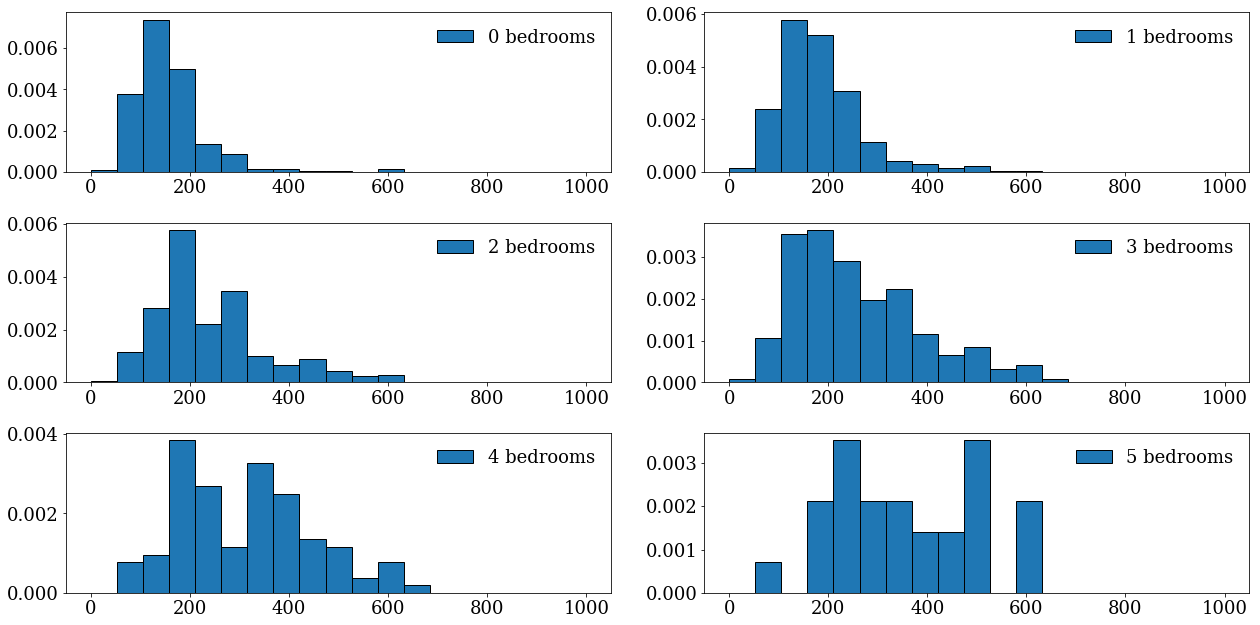

In [56]:
plt.figure(figsize = (18, 9))

for n_bedroom in range(0, 6):
    plt.subplot(3, 2, n_bedroom + 1)
    
    sub = listing_df[listing_df['bedrooms'] == n_bedroom]
    plt.hist(sub['price'], bins = np.linspace(0, 1000, 20), edgecolor = 'k',
            label = '{} bedrooms'.format(n_bedroom), density = True);
    plt.legend(frameon = False)
    
plt.tight_layout()
plt.savefig('image/price_histos_by_bedroom.png', bbox_inches = 'tight')

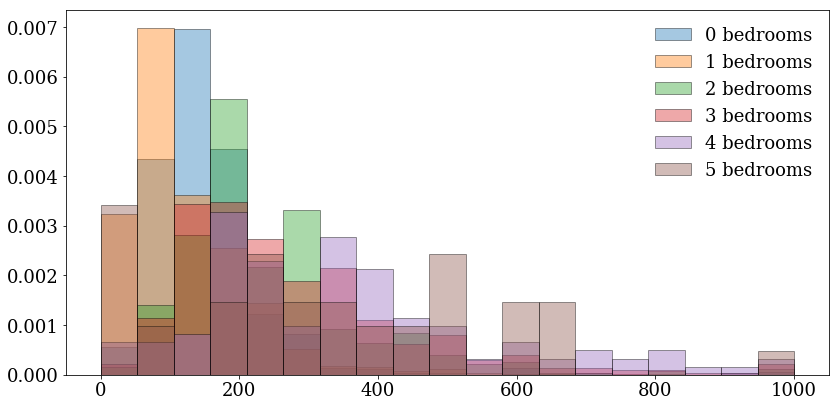

In [15]:
plt.figure(figsize = (12, 6))

for n_bedroom in range(0, 6):
    sub = listing_df[listing_df['bedrooms'] == n_bedroom]
    plt.hist(
        sub['price'], 
        bins = np.linspace(0, 1000, 20), 
        edgecolor = 'k',
        alpha = 0.4, 
        label = '{} bedrooms'.format(n_bedroom), 
        density = True
    );

plt.tight_layout()
plt.legend(frameon = False)

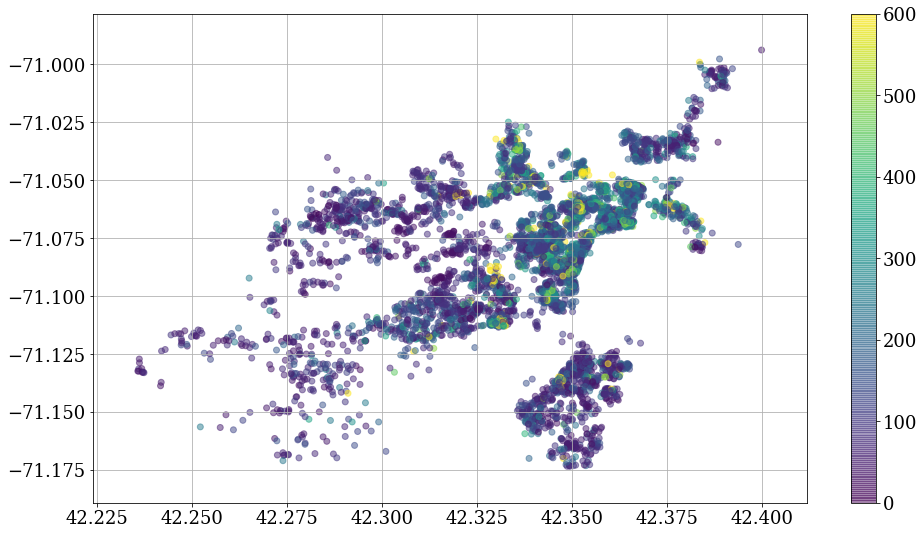

In [16]:
plt.figure(figsize = (16, 9))
plt.scatter(
    listing_df['latitude'],
    listing_df['longitude'],
    c = listing_df['price'],
    alpha = 0.5,
    vmax = 600
)
plt.grid()
plt.colorbar()
plt.savefig('image/geographic_pricing_map.png', bbox_inches = 'tight')

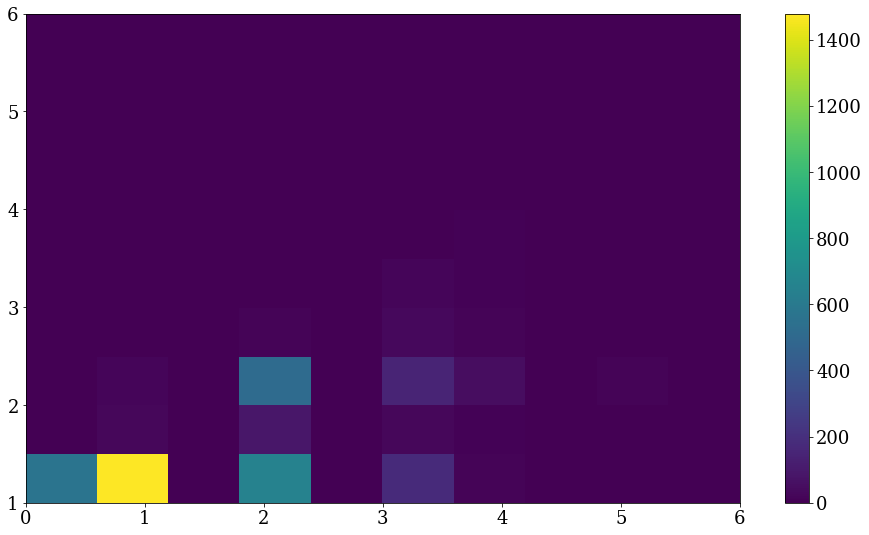

In [63]:
plt.figure(figsize = (16, 9))
plt.hist2d(
    listing_df['bedrooms'],
    listing_df['bathrooms']
)
plt.colorbar()
plt.savefig('image/bedbath_scatter.png', bbox_inches = 'tight')

In [17]:
listing_df['room_type'].value_counts()

Entire home/apt    4013
Private room       2175
Shared room         108
Name: room_type, dtype: int64

In [18]:
listing_df = listing_df[listing_df['room_type'] == 'Entire home/apt']
listing_df = listing_df[listing_df['price'] < 650]

In [19]:
listing_df.isnull().sum()

latitude            0
longitude           0
property_type       0
room_type           0
bathrooms           1
bedrooms            5
beds                1
price               0
availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

In [20]:
simple_features = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'price']

In [21]:
simple_df = listing_df[simple_features]

In [22]:
simple_df.dropna(how = 'any', inplace = True)

/Users/davidriser/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 5 artists>

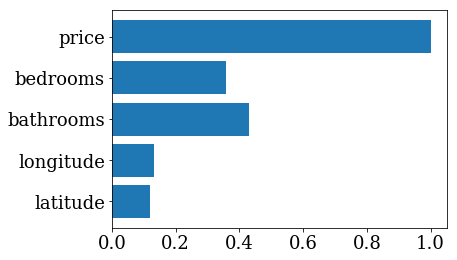

In [23]:
plt.barh(
    simple_df.corr()['price'].index,
    simple_df.corr()['price'].values
)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(simple_df[['latitude', 'longitude', 'bathrooms', 'bedrooms']], 
                                                   simple_df['price'])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss = StandardScaler()
ss.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_reg = LinearRegression()

In [31]:
linear_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = linear_reg.predict(x_test)

Text(0, 0.5, 'Predicted')

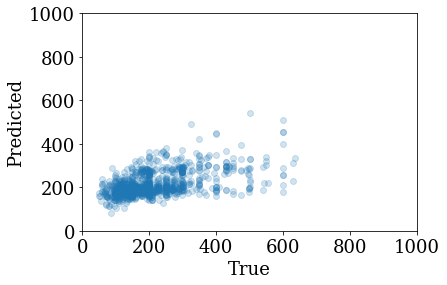

In [33]:
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel('True')
plt.ylabel('Predicted')

In [34]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [35]:
print(np.sqrt(mean_squared_error(y_pred, y_test)), median_absolute_error(y_pred, y_test), r2_score(y_pred, y_test))

91.54380595853205 53.1445844877494 -1.6775179669899898


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()

In [38]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

/Users/davidriser/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
print(np.sqrt(mean_squared_error(y_pred, y_test)), median_absolute_error(y_pred, y_test), r2_score(y_pred, y_test))

89.99317778077906 47.0 -0.2058859528245509


Text(0, 0.5, 'Predicted')

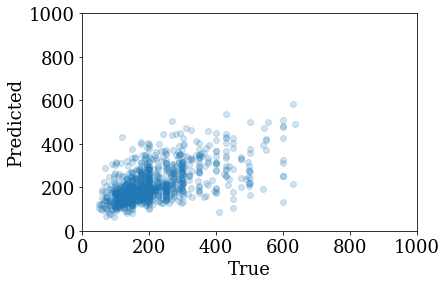

In [40]:
plt.scatter(y_test, y_pred, alpha = 0.2)
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.xlabel('True')
plt.ylabel('Predicted')

In [41]:
y_pred

array([163.7, 580.9, 267. , 190.4, 198.9, 145.7, 173.5,  91.4, 198.7,
       219.8, 192. , 239.1, 296.9, 182.6, 204.3, 315.5, 285.8, 110.9,
       296.7, 259.2, 122.1, 263.8, 451.3, 187.3, 195. , 153.4, 234.3,
       119.8, 119.7, 266.7, 140.7, 157.5, 146.4, 200.3, 136. , 165.4,
       187. , 144.7, 139.8, 155.5, 148.5, 132.8, 189.8, 334.6, 334.6,
       188. , 145. , 138.7, 191. , 255.8, 234.2, 300.3, 150.2, 168. ,
       310.6, 182.4, 150.9, 400.4, 100. , 199.8, 242.5, 122. , 176. ,
       188.4, 195.2, 330.2, 152.1, 200.4, 151.7, 246.3, 281.1, 135.9,
       463.5, 142.2, 316.9, 183.7, 124.9, 161.2, 306.4, 251.1, 306. ,
       182.5, 117.8, 164.1, 334.9, 170.6, 163.9, 145.4, 194.4, 244.9,
       190.6, 155.1, 197.2, 159. , 158.2, 141.4, 299.8, 155.4, 195.9,
       153.2, 323.8, 188.8, 152.3, 285.2, 148.3, 366. , 134.5, 165. ,
       493. , 395.9, 199.9, 266.9, 150. , 115. , 480.3, 203.4, 207.4,
       155.4, 337.9, 227.3, 187. , 274.3, 194.9, 426. , 323.1, 207.7,
       213. , 107.6,

In [42]:
y_test.values

array([225., 630., 139., 114., 149., 209., 399., 100., 299., 500., 100.,
       199., 225., 130., 132., 300., 179., 135., 277., 250.,  60.,  98.,
       291., 199., 269., 288., 177., 100., 150., 220., 110., 183., 200.,
       475., 110., 158., 134., 137.,  67., 136., 100., 160., 225., 159.,
       190., 349., 140., 100., 150., 175., 195., 269., 175., 125., 290.,
       140., 130., 305.,  99., 149., 159., 149., 133.,  95., 325., 350.,
       150., 225., 200., 495., 199., 125., 325., 166., 150., 145.,  50.,
       183.,  90., 265., 275.,  89., 115., 200., 285., 299., 209., 250.,
       140.,  95.,  85., 181., 117., 150., 144., 120., 250., 140., 189.,
       140., 220., 217., 270., 199., 132., 244., 150., 159., 637., 379.,
       250., 200., 146., 107., 600., 249., 200., 140., 158., 199.,  59.,
       269., 184., 450., 375., 299., 129.,  99., 200.,  60., 150., 599.,
       179., 165., 169., 329., 500., 265., 200., 150., 300., 189., 108.,
       319., 280., 169., 429., 166., 150., 175., 18

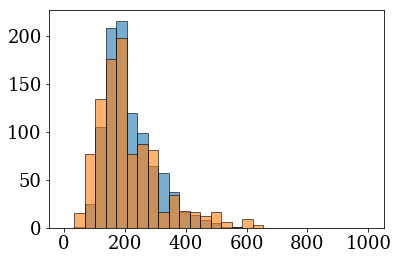

In [43]:
plt.hist(y_pred, bins = np.linspace(0, 1000, 30), edgecolor = 'k', alpha = 0.6);
plt.hist(y_test, bins = np.linspace(0, 1000, 30), edgecolor = 'k', alpha = 0.6);

In [44]:
rf.feature_importances_

array([0.38905226, 0.34706432, 0.19678685, 0.06709657])

In [45]:
listing_df['price_category'] = listing_df['price'].apply(
    lambda x: np.digitize(
        x,                
        np.linspace(0, 650, 6),
    )
)

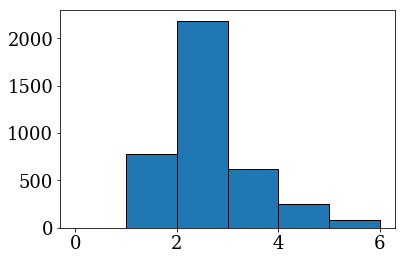

In [46]:
plt.hist(
    listing_df['price_category'],
    bins = np.arange(7),
    edgecolor = 'k'
);

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_classifier = RandomForestClassifier(n_jobs = -1, n_estimators = 100)

In [49]:
listing_df.dropna(how = 'any', inplace = True)
print('Have {} training samples'.format(len(listing_df)))

Have 3908 training samples


In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    listing_df[['latitude', 'longitude', 'bathrooms', 'bedrooms']], 
                                                   listing_df['price_category'])

In [51]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

In [53]:
y_pred = rf_classifier.predict(x_test)

In [54]:
confusion_matrix(y_pred, y_test)

array([[ 79,  66,   6,   2,   1],
       [ 87, 421,  89,  23,  11],
       [  7,  64,  49,  15,   3],
       [  2,  15,  13,  11,   1],
       [  0,   5,   2,   2,   3]])

In [55]:
accuracy_score(y_pred, y_test)

0.5762538382804504

### Crime Data

In [73]:
 crime_df = pd.read_csv('data/crime.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 24: invalid start byte

In [ ]:
!more data/crime.csv

INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REP ORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREE T,Lat,Long,Location
I182070945,00619,Larceny,LARCENY ALL OTHERS,D14,808,,2018-09-02 13:00:00,2018,9, Sunday,13,Part One,LINCOLN ST,42.35779134,-71.13937053,"(42.35779134, -71.139370 53)"
I182070943,01402,Vandalism,VANDALISM,C11,347,,2018-08-21 00:00:00,2018,8,Tuesday ,0,Part Two,HECLA ST,42.30682138,-71.06030035,"(42.30682138, -71.06030035)"
I182070941,03410,Towed,TOWED MOTOR VEHICLE,D4,151,,2018-09-03 19:27:00,2018,9,Mo nday,19,Part Three,CAZENOVE ST,42.34658879,-71.07242943,"(42.34658879, -71.07242 943)"
I182070940,03114,Investigate Property,INVESTIGATE PROPERTY,D4,272,,2018-09-03 21 :16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.33418175,-71.07866441,"(42.3341 8175, -71.07866441)"
I182070938,03114,Investigate Property,INVESTIGATE PROPERTY,B3,421,,2018-09-03 21 :05:00,2018,9,Monday,21,Part Three,DELHI ST,42.27536